# Module 10 Challenge

### Import Dependencies

In [115]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [116]:
import numpy as np
import pandas as pd
import datetime as dt

In [117]:
# Reflect Tables into SQLAlchemy ORM

## Reflect Tables into SQLAlchemy ORM

In [118]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [119]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [120]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(autoload_with = engine)


In [121]:
# View all of the classes that automap found
Base.classes.keys()

#This means we have 2 tables on our SQL File, measurement and station

['measurement', 'station']

In [122]:
# Save references to each table
measurement = Base.classes.measurement
stations = Base.classes.station

In [123]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [124]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)


('2017-08-23',)


Most Recent Date: ('2017-08-23',)
One Year from the Most Recent Date: 2016-08-23


<AxesSubplot:title={'center':'Inches of Precipitation in 1 year'}, xlabel='Date', ylabel='Inches of rain'>

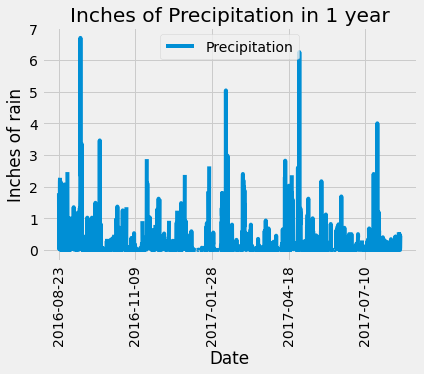

In [125]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Most Recent Date: {most_recent_date}")

# Calculate the date one year from the last date in data set.
one_year_from_last = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(f"One Year from the Most Recent Date: {one_year_from_last}")



# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_from_last).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_scores, columns = ["Date", "Precipitation"]).set_index("Date")


# Sort the dataframe by date
precipitation_sorted = precipitation_df.sort_values("Date")


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_sorted.plot(y = "Precipitation", title = "Inches of Precipitation in 1 year", xlabel = "Date", ylabel = "Inches of rain", rot = 90)


In [126]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats = precipitation_sorted.describe()
precipitation_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [127]:
# Design a query to calculate the total number of stations in the dataset
total_num_stations = session.query(stations.name).count()
print(total_num_stations)

9


In [128]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

stations_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc())

for activity in stations_activity:
    print(activity)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [129]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = stations_activity.first()[0]

lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station).first()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station).first()
average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station).first()

print("Most Active Station: ", most_active_station)
print("Lowest Registered Temperature: ", lowest_temp)
print("Highest Registered Temperature: ", highest_temp)
print("Average Temperature: ", average_temp)



Most Active Station:  USC00519281
Lowest Registered Temperature:  (54.0,)
Highest Registered Temperature:  (85.0,)
Average Temperature:  (71.66378066378067,)


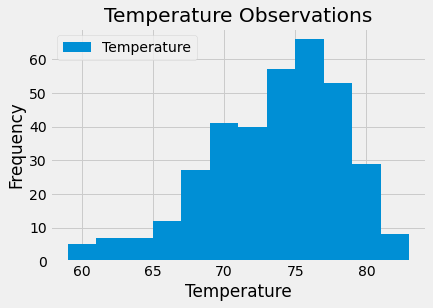

In [130]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_temps = session.query(measurement.date, measurement.tobs).filter(measurement.station == most_active_station).filter(measurement.date >= one_year_from_last).all()

most_active_station_temps_df = pd.DataFrame(most_active_station_temps, columns = ["Date", "Temperature"])

most_active_station_temps_df.plot.hist(bins = 12, title = "Temperature Observations", ylabel = "Frequency of Observation")
plt.xlabel("Temperature")
plt.show()

In [131]:
# Close Session
session.close()